In [1]:
import numpy as np 
import pandas as pd
import json

meta = pd.read_csv('data/movies_metadata.csv')
meta.head()

C:\ProgramData\ANA\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [2]:
meta = meta[['id', 'original_title', 'original_language', 'genres']] ##써야할 데이터를 출여서 분석한다.
meta = meta.rename(columns={'id':'movieId'})
meta = meta[meta['original_language'] == 'en'] ##영어 영화만 사용한다.
meta.head()

,movieId,original_title,original_language,genres
0,862,Toy Story,en,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,Jumanji,en,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,Grumpier Old Men,en,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,Waiting to Exhale,en,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,Father of the Bride Part II,en,"[{'id': 35, 'name': 'Comedy'}]"


In [4]:
ratings = pd.read_csv('data/ratings.csv')  
ratings = ratings[['userId', 'movieId', 'rating']]
ratings.head()

,userId,movieId,rating
0,1,110,1.0
1,1,147,4.5
2,1,858,5.0
3,1,1221,5.0
4,1,1246,5.0


In [5]:
ratings.describe()

,userId,movieId,rating
count,8.873193e+06,8.873193e+06,8.873193e+06
mean,4.581210e+04,1.599187e+04,3.528825e+00
std,2.638140e+04,3.130343e+04,1.060272e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,2.299500e+04,1.073000e+03,3.000000e+00
50%,4.578100e+04,2.607000e+03,3.500000e+00
75%,6.870400e+04,6.538000e+03,4.000000e+00
max,9.146700e+04,1.762710e+05,5.000000e+00


In [6]:
meta.movieId = pd.to_numeric(meta.movieId, errors='coerce')  ##문자열을 숫자로 변환
ratings.movieId = pd.to_numeric(ratings.movieId, errors='coerce')


In [7]:
def parse_genres(genres_str):   ##장르를 배열 형식으로 변환
    genres = json.loads(genres_str.replace('\'', '"'))
    
    genres_list = []
    for g in genres:
        genres_list.append(g['name'])

    return genres_list

meta['genres'] = meta['genres'].apply(parse_genres)

meta.head()

,movieId,original_title,original_language,genres
0,862,Toy Story,en,"[Animation, Comedy, Family]"
1,8844,Jumanji,en,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,en,"[Romance, Comedy]"
3,31357,Waiting to Exhale,en,"[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,en,[Comedy]


In [8]:
data = pd.merge(ratings, meta, on='movieId', how='inner')##movieid 기준으로 평가와 영화 데이터를 합친다.
data.head()

,userId,movieId,rating,original_title,original_language,genres
0,1,858,5.0,Sleepless in Seattle,en,"[Comedy, Drama, Romance]"
1,3,858,4.0,Sleepless in Seattle,en,"[Comedy, Drama, Romance]"
2,5,858,5.0,Sleepless in Seattle,en,"[Comedy, Drama, Romance]"
3,12,858,4.0,Sleepless in Seattle,en,"[Comedy, Drama, Romance]"
4,20,858,4.5,Sleepless in Seattle,en,"[Comedy, Drama, Romance]"


In [16]:
combined = pd.merge(meta, ratings)
combined.head()

,movieId,original_title,original_language,genres,userId,rating
0,862,Toy Story,en,"[Animation, Comedy, Family]",1923,3.0
1,862,Toy Story,en,"[Animation, Comedy, Family]",2103,5.0
2,862,Toy Story,en,"[Animation, Comedy, Family]",5380,1.0
3,862,Toy Story,en,"[Animation, Comedy, Family]",6177,4.0
4,862,Toy Story,en,"[Animation, Comedy, Family]",6525,4.0


In [17]:
matrix = data.pivot_table(index='userId', columns='original_title', values='rating')
matrix.head(20)
##피벗 테이틀 작성
##NaN  평가하지  않은 영화

original_title,!Women Art Revolution,$5 a Day,'Gator Bait,'R Xmas,'Twas the Night Before Christmas,(A)Sexual,...And the Pursuit of Happiness,10 Items or Less,10 Things I Hate About You,"10,000 BC",...,Дневник его жены,Мой сводный брат Франкенштейн,Седьмой спутник,"Цирк сгорел, и клоуны разбежались",به امید دیدار,مارمولک,რამინი,軍旗はためく下に,黑太陽731,태풍
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pearson correlation

In [12]:

GENRE_WEIGHT = 0.1
def pearsonR(s1, s2):
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))


유사 장르에 대한 추천 알고리즘


In [18]:
def recommend(input_movie, matrix, n, similar_genre=True):
    input_genres = meta[meta['original_title'] == input_movie]['genres'].iloc(0)[0]

    result = []
    for title in matrix.columns:
        if title == input_movie:
            continue

        # rating comparison
        cor = pearsonR(matrix[input_movie], matrix[title])
        
        # genre comparison
        if similar_genre and len(input_genres) > 0:
            temp_genres = meta[meta['original_title'] == title]['genres'].iloc(0)[0]

            same_count = np.sum(np.isin(input_genres, temp_genres))
            cor += (GENRE_WEIGHT * same_count)
        
        if np.isnan(cor):
            continue
        else:
            result.append((title, '{:.2f}'.format(cor), temp_genres))
            
    result.sort(key=lambda r: r[1], reverse=True)
    return result[:n]


##비슷한 장르에 대해서 가중치를 주어서 추천을 해준다.
recommend_result = recommend('Hitman', matrix, 20, similar_genre=True)
ab = pd.DataFrame(recommend_result, columns = ['Title', 'Correlation', 'Genre'])
ab = pd.DataFrame(ab) 
ab.head(10)


C:\ProgramData\ANA\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


,Title,Correlation,Genre
0,Get Carter,0.46,"[Action, Drama, Thriller, Crime]"
1,48 Hrs.,0.45,"[Thriller, Action, Comedy, Crime, Drama]"
2,The Driver,0.45,"[Action, Crime, Drama, Thriller]"
3,The Way of the Gun,0.45,"[Action, Crime, Drama, Thriller]"
4,Dark Blue,0.44,"[Action, Crime, Drama, Thriller]"
5,The Departed,0.44,"[Drama, Thriller, Crime]"
6,The Ice Harvest,0.44,"[Action, Adventure, Comedy, Crime, Drama, Thri..."
7,The Net,0.44,"[Crime, Drama, Mystery, Thriller, Action]"
8,Training Day,0.44,"[Action, Crime, Drama, Thriller]"
9,Best Seller,0.43,"[Action, Crime, Drama, Thriller]"


In [19]:

#데이터 사람들이 준 별점의 분포, 그 사람들이 평과를 일관되게 하는지 호불호가 강한지, 평을 몇번 하였는지를 그래프로 도출합니다. 
target_col = ['original_title', 'userId', 'rating']
counted = combined[target_col].groupby('userId').agg({'rating' : [np.size, np.mean, np.std]})
popular = counted['rating']['size'] >= 10

popular_movies = counted[popular]

abc = pd.DataFrame(ab, columns = ['Correlation']) 
combined_result = popular_movies.join(abc)
combined_result.sort_values(by = ['Correlation'], ascending = False).head()




C:\ProgramData\ANA\envs\tensorflow\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(rating, size)","(rating, mean)","(rating, std)",Correlation
userId,,,,
2,13.0,3.076923,1.187542,0.45
4,15.0,3.733333,1.032796,0.44
7,12.0,3.375000,1.150593,0.44
8,33.0,3.030303,1.131505,0.44
9,17.0,3.794118,1.104802,0.43


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D01140DA0>,
      dtype=object)

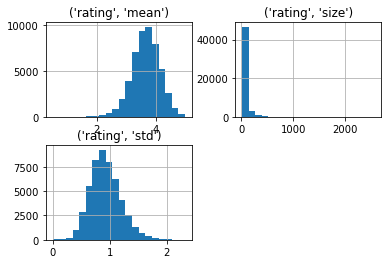

In [20]:
#그래프 3종류 한번에 보기
combined_result.hist(bins=20)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D00F3BBE0>]],
      dtype=object)

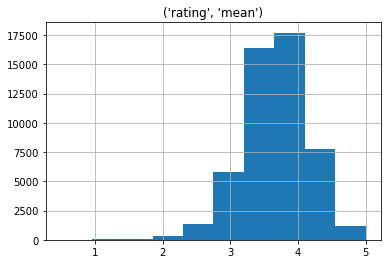

In [21]:

# 사람들이 준 별점의 분포가 거의 점수가 높은 결과값을 볼수 있다.
# 0 부터 5까지 이므로 중간값은 2.5 이지만, 평균은 5에 편향되어있다.
combined_result.hist(('rating', 'mean'))




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D09409780>]],
      dtype=object)

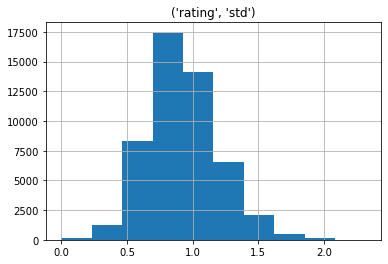

In [22]:
# 별점을 주는 사람의 표준편차 분포
# 낮을수록 일관된 평가를 하고, 높을수록 호불호 표현이 명확함을 의미 
combined_result.hist(('rating', 'std'))



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D091D0208>]],
      dtype=object)

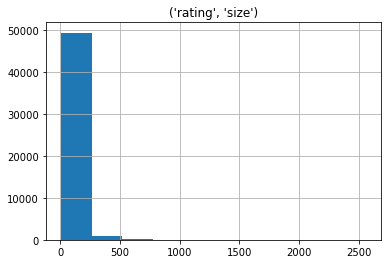

In [23]:
# 사람들이 영화 평을 몇 번 했는지를 나타내는 분포
combined_result.hist(('rating', 'size'))